In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from ydata_profiling import ProfileReport 

In [46]:
df = pd.read_csv('smoking_driking_dataset.csv')

In [47]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


### Checking if data is pre-processeed (Free of null values)

In [48]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [50]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [51]:
df["age"].value_counts()

40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: age, dtype: int64

In [ ]:
ProfileReport(df)

## Data visualization

 ### _1. Age vs Drinking Status_

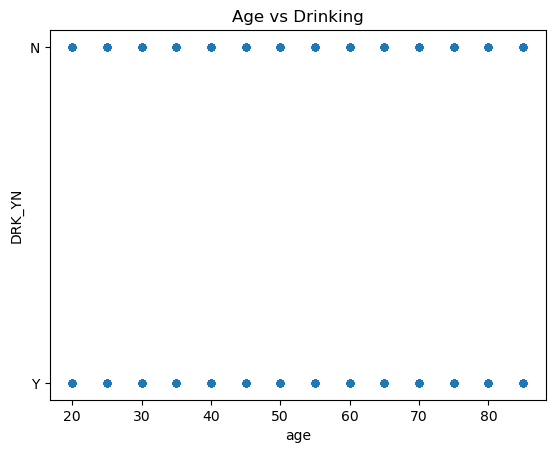

In [55]:
df.plot(kind='scatter', x='age', y='DRK_YN', title='Age vs Drinking');

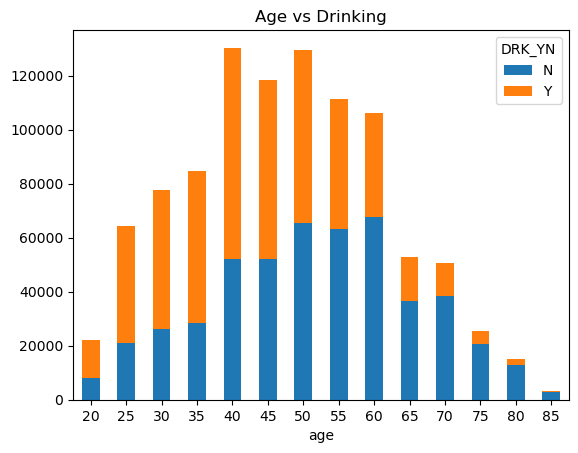

In [56]:
# Plotting a stacked bar graph for the age and drinking
df.groupby(['age','DRK_YN']).size().unstack().plot(kind='bar',stacked=True, rot=0, title="Age vs Drinking");

Seems like people older than 45 are more likely to smoke

<Axes: xlabel='age_group'>

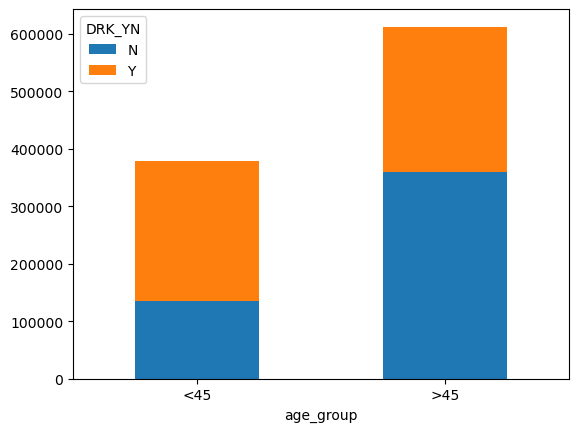

In [57]:
# Plotting a stacked bar graph for the age and smoking with only two x labels - age < 45 and age > 45
df_with_age_group = df.copy()
df_with_age_group['age_group'] = np.where(df['age']<45, '<45', '>45')
df_with_age_group.groupby(['age_group','DRK_YN']).size().unstack().plot(kind='bar',stacked=True, rot=0)

A better visualization for analysis would be percetanges

In [71]:
df_only_cat_age = df_with_age_group[['age_group','DRK_YN']].groupby(['age_group','DRK_YN']).size().unstack()
df_only_cat_age['total'] = df_only_cat_age.sum(axis=1)
df_only_cat_age['%_drinking'] = df_only_cat_age['Y']/df_only_cat_age['total'] * 100
df_only_cat_age['%_non_drinking'] = df_only_cat_age['N']/df_only_cat_age['total'] * 100
df_only_cat_age

DRK_YN,N,Y,total,%_drinking,%_non_drinking
age_group,,,,,
<45,135942,243110,379052,64.136319,35.863681
>45,359916,252378,612294,41.218434,58.781566


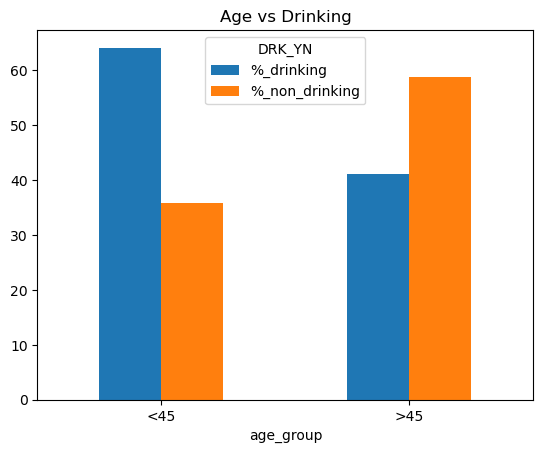

In [195]:
df_only_cat_age[['%_drinking','%_non_drinking']].plot(kind='bar',stacked=False, rot=0, title="Age vs Drinking");

Age seems to be factor since people less than 45 are 23% more likely to be drinkers

### 2. BMI vs Drinking

In [105]:
df_bmi = df.copy()
df_bmi["BMI"] = df_bmi["weight"] / (df_bmi["height"] / 100) ** 2
# Removing all columns except BMI and DRK_YN
df_bmi = df_bmi[['weight', 'height', 'BMI','DRK_YN']]
# df_bmi[df_bmi['BMI'] < 18.5] = 'Underweight'
# df_bmi[(df_bmi['BMI'] > 18.5) & (df_bmi['BMI'] < 25)] = 'Normal'
# df_bmi[(df_bmi['BMI'] > 25) & (df_bmi['BMI'] < 30)] = 'Overweight'
# df_bmi[(df_bmi['BMI'] > 30) & (df_bmi['BMI'] < 35)] = 'Obese'
# df_bmi[(df_bmi['BMI'] > 35) & (df_bmi['BMI'] < 40)] = 'Severely Obese'

#Sorting the dataframe by BMI
df_bmi = df_bmi.sort_values(by=['BMI'])

We cannot do a bar graph for this since this is more of a continuos dataset
So lets try a stacked histogram instead

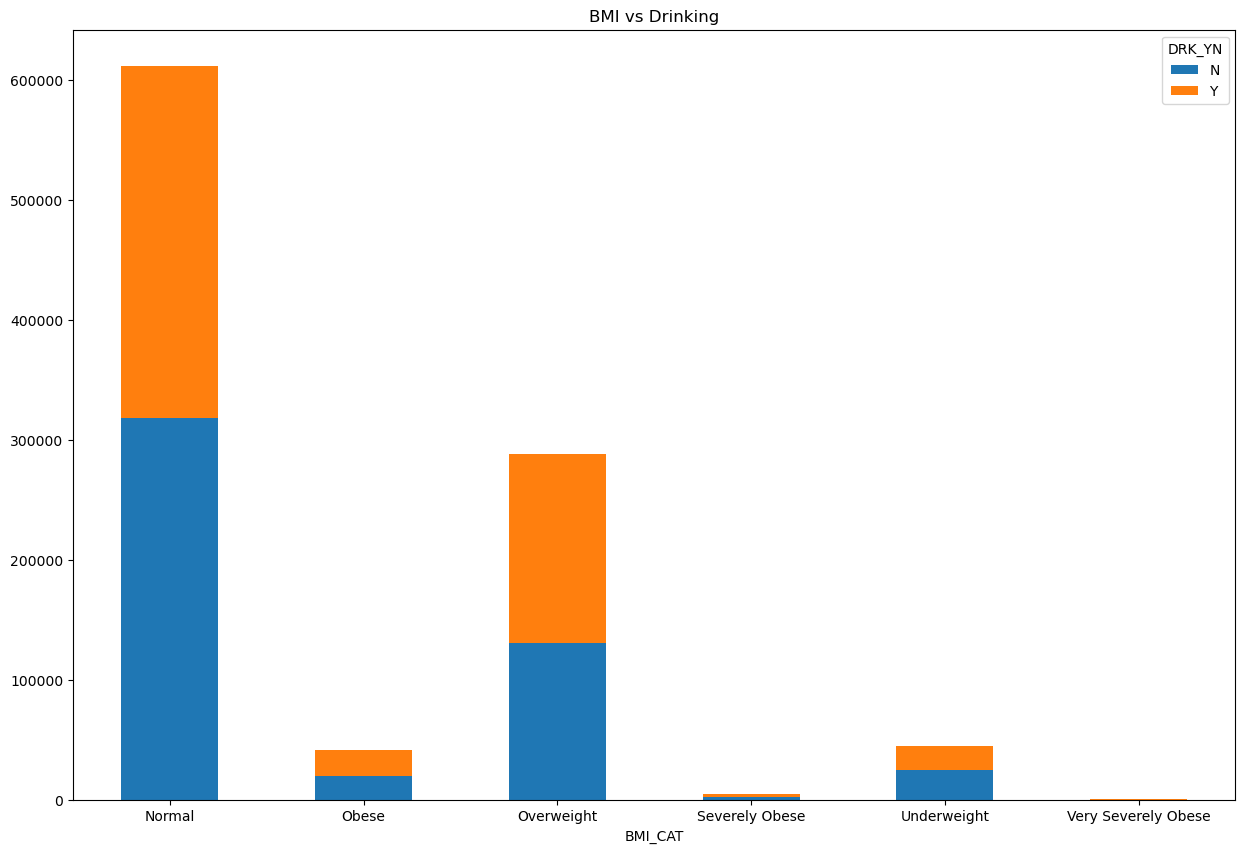

In [190]:
# Plotting a stacked histogram for the BMI and drinking
df_bmi_cat = df_bmi.groupby(['BMI','DRK_YN']).size().unstack()

# Cleaning the data
df_bmi_cat = df_bmi_cat.fillna(0)

# Replacing the BMI values with the category
df_bmi_cat["BMI_CAT"] = np.where(df_bmi_cat.index < 18.5, 'Underweight', np.where(df_bmi_cat.index < 25, 'Normal', np.where(df_bmi_cat.index < 30, 'Overweight', np.where(df_bmi_cat.index < 35, 'Obese', np.where(df_bmi_cat.index < 40, 'Severely Obese', 'Very Severely Obese')))))
df_bmi_cat.set_index("BMI_CAT", inplace=True)
df_bmi_cat = df_bmi_cat[['N','Y']]
df_bmi_cat = df_bmi_cat.groupby(['BMI_CAT']).sum()
df_bmi_cat.plot(kind='bar',stacked=True, rot=0, title="BMI vs Drinking", figsize=(15,10));

# Plotting a stacked histogram for the BMI and drinking
# df_bmi_cat.plot(kind='bar',stacked=True, rot=0, title="BMI vs Drinking");

Converting the above to percentages

In [191]:
# Converting the previous to percentages

df_bmi_cat['total'] = df_bmi_cat.sum(axis=1)
df_bmi_cat['%_drinking'] = df_bmi_cat['Y']/df_bmi_cat['total'] * 100
df_bmi_cat['%_non_drinking'] = df_bmi_cat['N']/df_bmi_cat['total'] * 100
df_bmi_cat

DRK_YN,N,Y,total,%_drinking,%_non_drinking
BMI_CAT,,,,,
Normal,317972.0,293437.0,611409.0,47.993569,52.006431
Obese,19755.0,21827.0,41582.0,52.491463,47.508537
Overweight,130901.0,157552.0,288453.0,54.619643,45.380357
Severely Obese,2371.0,2234.0,4605.0,48.512486,51.487514
Underweight,24765.0,20320.0,45085.0,45.070423,54.929577
Very Severely Obese,94.0,118.0,212.0,55.660377,44.339623


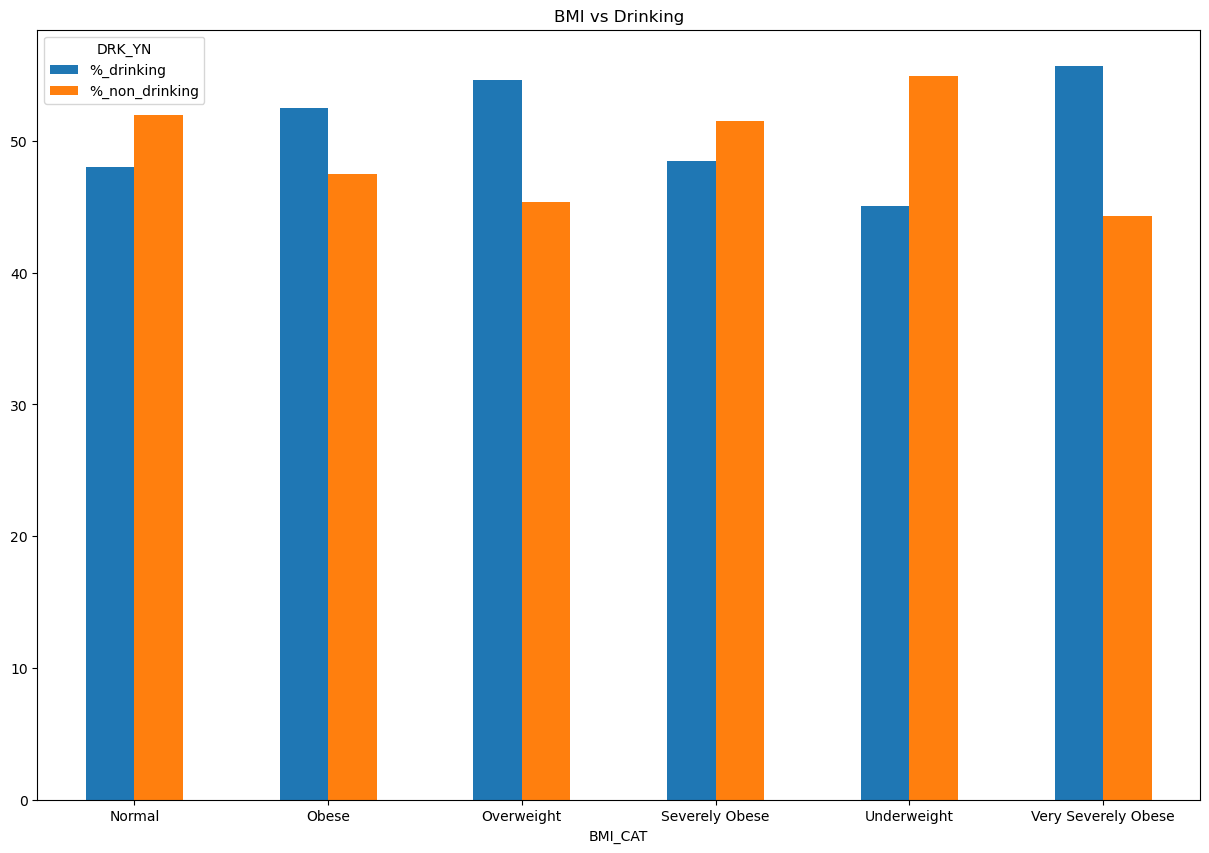

In [194]:
df_bmi_cat[['%_drinking', '%_non_drinking']].plot(kind='bar',stacked=False, rot=0, title="BMI vs Drinking", figsize=(15,10));    

There seems to be no correlation between BMI and Drinking